In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_df, mouse_drug_df, on="Mouse ID",how="left")
combined_data

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_gb = combined_data.groupby(['Drug','Timepoint'])
tumor_mean = tumor_gb["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean)

# Reset index and preview DataFrame
mean_tumor_volume_df = tumor_mean_df.reset_index()
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_gb = combined_data.groupby(['Drug','Timepoint'])
tumor_sem = tumor_gb["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_sem_df = pd.DataFrame(tumor_sem)
sem_df = tumor_sem_df.reset_index()

# Preview DataFrame
sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
refor_sem_df = sem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that reformatting worked
refor_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [5]:
# Minor Data Munging to Re-Format the Data Frames
refor_mean_tumor = mean_tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that reformatting worked
refor_mean_tumor.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


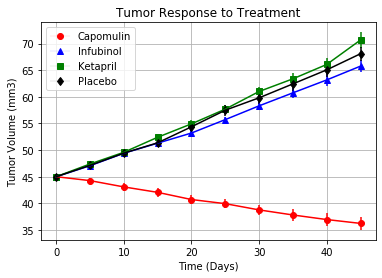

In [6]:
x = np.arange(0, 50, 5)

#Error Values for each drug
capo_err = refor_sem_df.Capomulin.values 
infu_err = refor_sem_df.Infubinol.values 
keta_err = refor_sem_df.Ketapril.values 
plac_err = refor_sem_df.Placebo.values 

#Mean values for each drug
y_capomulin = refor_mean_tumor['Capomulin']
y_infubinol = refor_mean_tumor['Infubinol']
y_ketapril = refor_mean_tumor['Ketapril']
y_placebo = refor_mean_tumor['Placebo']

#Plotting a line for each drug and its error bars
capomulin_handle, = plt.plot(x, y_capomulin, marker = 'o', linewidth=.1, color='red', label="Capomulin")
plt.errorbar(x, y_capomulin, yerr=capo_err, fmt='', ecolor = 'red', color='red',)
infubinol_handle = plt.plot(x, y_infubinol, marker = '^', linewidth=.1,color='blue', label="Infubinol")
plt.errorbar(x, y_infubinol, yerr=infu_err, fmt='', ecolor = 'blue', color='blue',)
ketapril_handle = plt.plot(x, y_ketapril, marker ='s', linewidth=.1,color='g', label="Ketapril")
plt.errorbar(x, y_ketapril, yerr=keta_err, fmt='', ecolor = 'g', color='g',)
placebo_handle = plt.plot(x, y_placebo, marker = 'd', linewidth=.1,color= 'k', label="Placebo")
plt.errorbar(x, y_placebo, yerr=plac_err, fmt='', ecolor = 'k', color='k',)

#Add grid, legend, title, x and y labels
plt.grid()
plt.legend()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig("../Images/my_treatment.png")

In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Metastatic Site Data Grouped by Drug and Timepoint 
meta_gb = combined_data.groupby(['Drug','Timepoint'])
meta_mean = meta_gb["Metastatic Sites"].mean()

# Convert to DataFrame
meta_mean_df = pd.DataFrame(meta_mean)
meta_mean_data_df = meta_mean_df.reset_index()

# Preview DataFrame
meta_mean_data_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_gb = combined_data.groupby(['Drug','Timepoint'])
meta_sem = meta_gb["Metastatic Sites"].sem()

# Convert to DataFrame
meta_sem_df = pd.DataFrame(meta_sem)
meta_sem_data_df = meta_sem_df.reset_index()

# Preview DataFrame
meta_sem_data_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
refor_meta_sem = meta_sem_data_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
refor_meta_sem.head()
refor_meta_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [11]:
# Minor Data Munging to Re-Format the Data Frames
refor_meta_mean = meta_mean_data_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
refor_meta_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


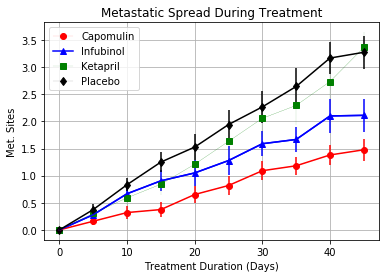

In [12]:
x = np.arange(0, 50, 5)
#Get metastatic standard error measure values
meta_capo_err = refor_meta_sem.Capomulin.values 
meta_infu_err = refor_meta_sem.Infubinol.values 
meta_keta_err = refor_meta_sem.Ketapril.values 
meta_plac_err = refor_meta_sem.Placebo.values 



# Generate the Plot (with Error Bars)
y_capomulin = refor_meta_mean['Capomulin']
y_infubinol = refor_meta_mean['Infubinol']
y_ketapril = refor_meta_mean['Ketapril']
y_placebo = refor_meta_mean['Placebo']

#Plot lines with errorbar
capomulin_handle, = plt.plot(x, y_capomulin, marker = 'o', linewidth=.1,color='red', label="Capomulin")
plt.errorbar(x, y_capomulin, yerr=meta_capo_err, fmt='', ecolor = 'red', color='red',)
infubinol_handle = plt.plot(x, y_infubinol, marker = '^',color='blue', label="Infubinol")
plt.errorbar(x, y_infubinol, yerr=meta_infu_err, fmt='', ecolor = 'blue', color='blue',)
ketapril_handle = plt.plot(x, y_ketapril, marker ='s', linewidth=.1,color='g', label="Ketapril")
plt.errorbar(x, y_ketapril, yerr=meta_keta_err, fmt='', linewidth=.1,ecolor = 'g', color='g',)
placebo_handle = plt.plot(x, y_placebo, marker = 'd', linewidth=.1,color= 'k', label="Placebo")
plt.errorbar(x, y_placebo, yerr=meta_plac_err, fmt='', ecolor = 'k', color='k',)

#Add grid, legend, title, x and y labels
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend()
plt.grid()

# Save the Figure
plt.savefig("../Images/my_spread.png")

In [13]:
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
#Groupby Drug and Timepoint and get Mouse ID count
mouse_gb = combined_data.groupby(['Drug','Timepoint'])
mouse_count = mouse_gb["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)
mouse_count_data_df = mouse_count_df.reset_index()
# Preview DataFrame
mouse_count_data_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
refor_mouse_count = mouse_count_data_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')

# Preview the Data Frame
refor_mouse_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [16]:
#generate new data frame with relevant drugs. Then divide columns by 25 and multiply by a 100.
df = refor_mouse_count[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
mouse_plot_data = df*(1/25)*100
mouse_plot_data.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


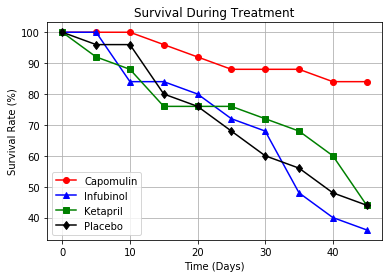

In [17]:
x = np.arange(0, 50, 5)
#Get mouse values
y_capomulin = mouse_plot_data['Capomulin']
y_infubinol = mouse_plot_data['Infubinol']
y_ketapril = mouse_plot_data['Ketapril']
y_placebo = mouse_plot_data['Placebo']

#plot y-values
capomulin_handle, = plt.plot(x, y_capomulin, marker = 'o', color='red', label="Capomulin")
infubinol_handle = plt.plot(x, y_infubinol, marker = '^', color='blue', label="Infubinol")
ketapril_handle = plt.plot(x, y_ketapril, marker ='s', color='g', label="Ketapril")
placebo_handle = plt.plot(x, y_placebo, marker = 'd', color= 'k', label="Placebo")

#Add grid, legend, title, x and y labels
plt.legend()
plt.grid()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("../Images/my_survival.png")

![Metastatic Spread During Treatment](../Images/survival.png)

In [18]:
# Show the Figure
plt.show()

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
last_row = refor_mean_tumor.iloc[-1]
first_row = refor_mean_tumor.iloc[0]
percent_change = ((last_row - first_row)/first_row)*100
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [20]:
percent_change_df = pd.DataFrame(percent_change)
percent_change_df.columns = ['Percent_Change']

specific_drugs = percent_change_df.iloc[[0,2,3,5]]
percent_values = specific_drugs.Percent_Change.values

x_axis = np.arange(len(percent_values))

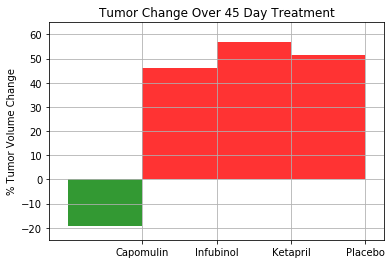

In [21]:
#Choose colors for the percent change
color = ['green','red','red','red']
#Plot Bar Graph
plt.bar(x_axis, percent_values, color=color, alpha=0.8, align="edge", width=1)
tick_locations = [value for value in (x_axis+1)]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.xlim(-0.25, len(x_axis)+0.25)
plt.ylim(-25, 65)
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
# Save the Figure
plt.savefig("../Images/my_change.png")

In [22]:
#Show the Figure
plt.show()